In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm import tqdm

This image is: <class 'numpy.ndarray'> with dimensions: (719, 1280, 3)


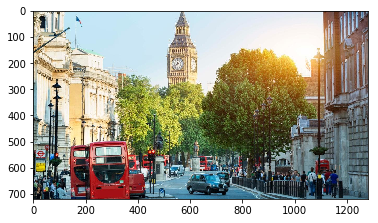

In [2]:
#reading in an image
image = cv2.imread('london.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')
plt.show()

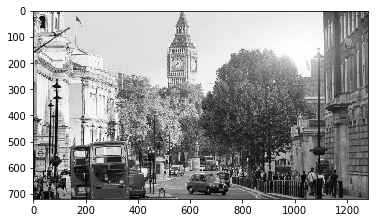

In [3]:
# image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# plt.imshow(image,cmap='gray')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap="gray")

In [4]:
batch = [[1/16,2/16,1/16],
         [2/16,4/16,2/16],
         [1/16,2/16,1/16]]
edgesbatch =[[2,1,2],[0,0,0],[2,1,2]]
test = np.zeros((3,3))
kernel = np.array([[-1, -1, -1],
                   [-1, 4, -1],
                   [-1, -1, -1]])

In [5]:
def applyBatch(image,batch,i,j):
    x = 0.0
    for k in range(0,2):
        for h in range(0,2):
            x = x + batch[k][h]*image[i+k-1][j+h-1]
    return x

In [6]:
def batchImage(image,batch):
    result = np.zeros(image.shape)
    for i in tqdm(range(1,image.shape[0])):
        for j in range(1,image.shape[1]):
            result[i][j]=applyBatch(image,batch,i,j)
    return result

100%|██████████| 718/718 [00:06<00:00, 111.06it/s]


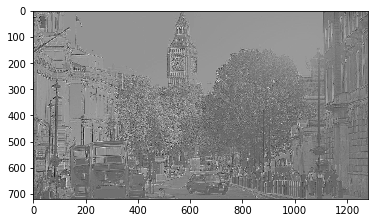

In [7]:
newImg = batchImage(gray,kernel)
plt.imshow(newImg,cmap="gray")